<a href="https://colab.research.google.com/github/pessoasnil/code_interview_training/blob/master/Analise_de_ativos_Inventario_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS:
## Análise do inventário de ativos de informática Fundação Esperança

---



# **BASE MANTIDA 01**

In [ ]:
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx')
print(f"linhas:{dadosatv.shape[0]}")
print(f"colunas:{dadosatv.shape[1]}")

linhas:37
colunas:12


In [ ]:
import pandas as pd #analisar e modelar os dados para Python
import matplotlib.pyplot as plt # criação de gráficos, histogramas, etc.
import numpy as np #operações com matrizes n-dimensionais 

In [ ]:
# 1 - Montar o Drive, 2 - Copiar o caminho do arquivo, 3 - Criar o dataframe
#from IPython.utils import encoding
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx', usecols = [2,3,4,5,6,11]) 
dadosatv.head()

,ID SETOR,SETOR,TIPO,MODELO,SITUAÇÃO,CENTRO DE CUSTO
0,1.0,Secretaria Acadêmica,Computador PC,Genérico,Manutenção,CEPES - 003
1,1.0,Secretaria Acadêmica,Computador PC,Genérico,Operacional,CEPES - 003
2,1.0,Secretaria Acadêmica,Computador PC,Dell Vostro,Operacional,CEPES - 003
3,1.0,Secretaria Acadêmica,Computador PC,Dell Vostro,Operacional,CEPES - 003
4,1.0,Secretaria Acadêmica,Computador PC,Genérico,Operacional,CEPES - 003


In [ ]:
dadosatv['SETOR'].unique() #listando os setores existentes na base do inventário

array(['Secretaria Acadêmica ', 'Coordenação ', 'Biblioteca',
       'Sala dos Professores', 'Laboratório de Informática', 'Geral'],
      dtype=object)

In [ ]:
dadosatv.info() #conhecendo os parametros da base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID SETOR         37 non-null     float64
 1   SETOR            37 non-null     object 
 2   TIPO             37 non-null     object 
 3   MODELO           37 non-null     object 
 4   SITUAÇÃO         37 non-null     object 
 5   CENTRO DE CUSTO  37 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.9+ KB


In [ ]:
dadosatv['SETOR'].value_counts()

Laboratório de Informática    18
Biblioteca                     7
Secretaria Acadêmica           5
Coordenação                    5
Sala dos Professores           1
Geral                          1
Name: SETOR, dtype: int64

In [ ]:
dadosatv['SITUAÇÃO'].value_counts()

Operacional    27
Manutenção     10
Name: SITUAÇÃO, dtype: int64

In [ ]:
dadosatv['TIPO'].value_counts() 

Computador PC    36
Notebook          1
Name: TIPO, dtype: int64

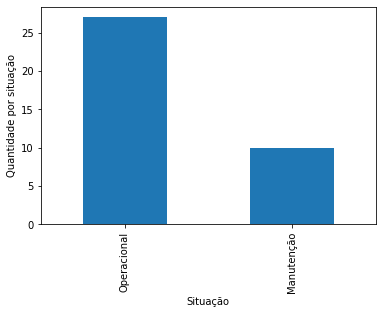

In [ ]:
dadosatv['SITUAÇÃO'].value_counts().plot.bar() 
plt.xlabel('Situação')
plt.ylabel('Quantidade por situação')
plt.show()

In [ ]:
iv_situacao = dadosatv.groupby('SETOR')['SITUAÇÃO'].apply(lambda x: (x== 'Manutenção').sum()) # 1 -groupby() é utilizado p/ agrupar os ativos por setor. 2 - Uso a função lambda p/ contar a quantidade de ativos em "manutenção" por setor.
iv_situacao = iv_situacao.sort_values(ascending= False) 
print(iv_situacao) 

SETOR
Sala dos Professores\t                               3
Biblioteca                                           1
Comercial\t                                          1
Coordenação Geral\t                                  1
Financeiro\t                                         0
Secretaria Acadêmica                                 0
SPA Campus II\t                                      0
SESMT                                                0
Responsável Técnica Clinica Escola Fisioterapia\t    0
Recepção Clinica Escola de Fisioterapia\t            0
Recepção                                             0
R.H\t                                                0
Pós Graduação\t                                      0
Fies\t                                               0
Biotério                                             0
Coordenação de Pós-Graduação\t                       0
Coordenação de Pedagogia\t                           0
Coordenação de Odontologia\t                         0
Coor

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


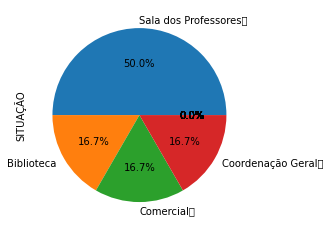

In [ ]:
iv_situacao.plot(kind='pie', autopct='%.1f%%')

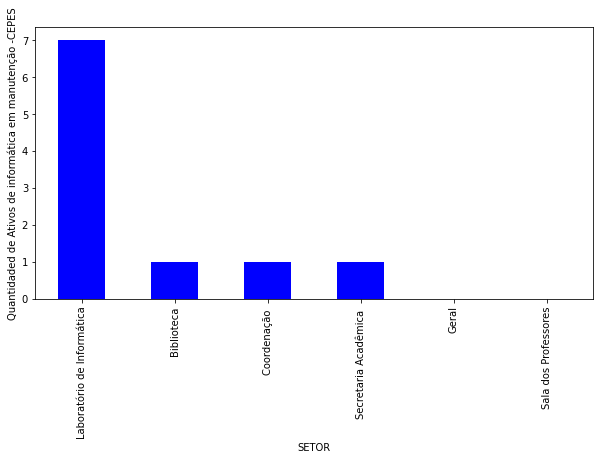

In [ ]:
iv_situacao.plot(kind='bar', figsize=(10,5), color='b') # 1 - com o argumento kind estou utilizando uma forma de definir o tipo de gráfico, 2 - figsize, para definir o tamanho da imagem, 3- color, para definir a cor das barras
plt.ylabel ('Quantidaded de Ativos de informática em manutenção -CEPES') #legenda do gráfico no eixo y
plt.show()

# **BASE MATRIZ - FE**

In [ ]:
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx', sheet_name='MATRIZ')
print(f"linhas:{dadosatv.shape[0]}")
print(f"colunas:{dadosatv.shape[1]}")

linhas:22
colunas:11


In [ ]:
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx', sheet_name='MATRIZ', usecols = [2,3,4,5,7,10])
dadosatv.head()

,SETOR,TIPO,MODELO,SITUAÇÃO,MÉMORIA,CENTRO DE CUSTO
0,Clínica Odontológica\t,Notebook,Lenovo IdeaPad 330,Operacional,DDR-4 4GB,MATRIZ-001
1,Clínica Odontológica\t,Notebook,Lenovo IdeaPad 330,Operacional,DDR-4 4GB,MATRIZ-001
2,Clínica Odontológica\t,Computador PC,Genérico,Operacional,DDR-3 4GB,MATRIZ-001
3,Clínica Odontológica\t,Computador PC,Genérico,Operacional,DDR-4 8GB,MATRIZ-001
4,Clínica Odontológica\t,Computador PC,Genérico,Operacional,DDR-3 4GB,MATRIZ-001


In [ ]:
dadosatv['SETOR'] = dadosatv['SETOR'].str.replace("\t", "") #Removendo formatações da base, utilizando o método str.replace para substituir \t por uma str vazia

In [ ]:
dadosatv.head()

,SETOR,TIPO,MODELO,SITUAÇÃO,CENTRO DE CUSTO
0,Clínica Odontológica,Notebook,Lenovo IdeaPad 330,Operacional,MATRIZ-001
1,Clínica Odontológica,Notebook,Lenovo IdeaPad 330,Operacional,MATRIZ-001
2,Clínica Odontológica,Computador PC,Genérico,Operacional,MATRIZ-001
3,Clínica Odontológica,Computador PC,Genérico,Operacional,MATRIZ-001
4,Clínica Odontológica,Computador PC,Genérico,Operacional,MATRIZ-001


In [ ]:
dadosatv['SETOR'].value_counts() 

T.I                              6
Clínica Odontológica             5
Clinica Escola Odontologia/01    3
Administração                    3
LGPD                             2
Clinica Escola Odontologia/3     1
Clinica Escola Odontologia/2     1
SESMT                            1
Name: SETOR, dtype: int64

In [ ]:
#Exibindo os setores por quantidade de equipamentos em manutenção
iv_situacao = dadosatv.groupby('SETOR')['SITUAÇÃO'].apply(lambda x: (x== 'Manutenção').sum())
iv_situacao = iv_situacao.sort_values(ascending= False) 
print(iv_situacao)

SETOR
Administração                    0
Clinica Escola Odontologia/01    0
Clinica Escola Odontologia/2     0
Clinica Escola Odontologia/3     0
Clínica Odontológica             0
LGPD                             0
SESMT                            0
T.I                              0
Name: SITUAÇÃO, dtype: int64


In [ ]:
dadosatv['TIPO'].unique() #LISTANDO OS ATIVOS POR CATEGORIA

array(['Notebook', 'Computador PC', 'Computador PC\t', 'All In One'],
      dtype=object)

In [ ]:
dadosatv['TIPO'] = dadosatv['TIPO'].str.replace("\t", "") 

In [ ]:
dadosatv['TIPO'].unique()

array(['Notebook', 'Computador PC', 'All In One'], dtype=object)

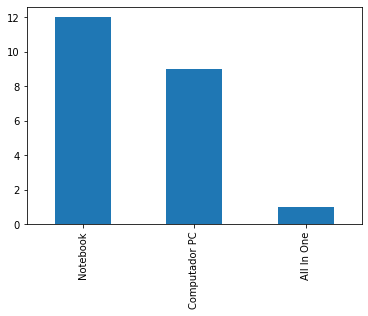

In [ ]:
dadosatv['TIPO'].value_counts().plot.bar()

# **BASE MANTIDA 02 (CAMPUS I, II e III)**

In [ ]:
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx', sheet_name='MANTIDA 02')
print(f"linhas:{dadosatv.shape[0]}")
print(f"colunas:{dadosatv.shape[1]}")

linhas:67
colunas:11


In [ ]:
dadosatv = pd.read_excel('/content/drive/MyDrive/INVENTÁRIO .xlsx', sheet_name='MANTIDA 02' , usecols=[0,2,3,5,7,10])
dadosatv.head() #lendo os dados da base

,CAMPUS,SETOR,TIPO,SITUAÇÃO,MÉMORIA,CENTRO DE CUSTO
0,CAMPUS I,Áudio e Vídeo,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
1,CAMPUS I,Áudio e Vídeo,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
2,CAMPUS I,Biblioteca,Computador PC,Operacional,DDR-3 2GB,IESPES - 002
3,CAMPUS I,Biblioteca,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
4,CAMPUS I,Biblioteca,Computador PC,Operacional,DDR-3 4GB,IESPES - 002


In [ ]:
dadosatv['SETOR'].unique() #Verifcando todos os setores existentes na página especificada

array(['Áudio e Vídeo        ', 'Biblioteca', 'Central de Atendimento\t',
       'Cobrança\t', 'Comercial\t', 'Contabilidade',
       'Coordenação Geral\t', 'Coordenação de Pedagogia\t',
       'Coordenação de Pós-Graduação\t',
       'Coordenação Geral - Radiologia\t', 'Fies\t', 'Financeiro\t',
       'Pós Graduação\t', 'R.H\t', 'Sala dos Professores\t',
       'Secretaria Acadêmica ', 'SESMT', 'Biotério', 'SPA Campus II\t',
       'Coordenação de Fisioterapia\t',
       'Recepção Clinica Escola de Fisioterapia\t', 'Recepção      ',
       'Responsável Técnica Clinica Escola Fisioterapia\t',
       'Coordenação de Odontologia\t'], dtype=object)

In [ ]:
dadosatv['SETOR'] = dadosatv['SETOR'].str.replace("\t", "") #removendo a formatação

In [ ]:
dadosatv['SETOR'].unique()

array(['Áudio e Vídeo        ', 'Biblioteca', 'Central de Atendimento',
       'Cobrança', 'Comercial', 'Contabilidade', 'Coordenação Geral',
       'Coordenação de Pedagogia', 'Coordenação de Pós-Graduação',
       'Coordenação Geral - Radiologia', 'Fies', 'Financeiro',
       'Pós Graduação', 'R.H', 'Sala dos Professores',
       'Secretaria Acadêmica ', 'SESMT', 'Biotério', 'SPA Campus II',
       'Coordenação de Fisioterapia',
       'Recepção Clinica Escola de Fisioterapia', 'Recepção      ',
       'Responsável Técnica Clinica Escola Fisioterapia',
       'Coordenação de Odontologia'], dtype=object)

In [ ]:
dadosatv.sort_values(by='CAMPUS') #ordenando os dados em ordem alfabetica a partir da coluna CAMPUS

,CAMPUS,SETOR,TIPO,SITUAÇÃO,MÉMORIA,CENTRO DE CUSTO
0,CAMPUS I,Áudio e Vídeo,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
32,CAMPUS I,Coordenação Geral\t,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
34,CAMPUS I,Coordenação de Pós-Graduação\t,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
35,CAMPUS I,Coordenação Geral - Radiologia\t,Notebook,Operacional,DDR-3 4GB,IESPES - 002
36,CAMPUS I,Fies\t,Computador PC,Operacional,DDR-3 4GB,IESPES - 002
...,...,...,...,...,...,...
65,CAMPUS III,Responsável Técnica Clinica Escola Fisioterapia\t,Notebook,Operacional,DDR-4 4GB,IESPES - 002
62,CAMPUS III,Coordenação de Fisioterapia\t,Notebook\t,Operacional,DDR-4 4GB,IESPES - 002
63,CAMPUS III,Recepção Clinica Escola de Fisioterapia\t,Notebook\t,Operacional,DDR-4 4GB,IESPES - 002
64,CAMPUS III,Recepção,Notebook\t,Operacional,DDR-4 4GB,IESPES - 002


In [ ]:
dadosatv.groupby(['SETOR', 'TIPO']).size().reset_index(name='Quantidade') #Aqui eu estou agrupando (groupby) as linhas da coluna setor de acordo com a coluna tipo e usando "size" p/contar cada grupo. e no final, adicionando uma coluna de saída chamada "quantidade"

,SETOR,TIPO,Quantidade
0,Biblioteca,Computador PC,9
1,Biotério,Computador PC,1
2,Central de Atendimento\t,Computador PC,6
3,Cobrança\t,Computador PC,2
4,Comercial\t,Computador PC,2
5,Comercial\t,Notebook\t,1
6,Contabilidade,Computador PC,5
7,Coordenação Geral\t,All In One\t,1
8,Coordenação Geral\t,Computador PC,3
9,Coordenação Geral\t,Notebook,2


In [ ]:
dadosatv['TIPO'] = dadosatv['TIPO'].str.replace("\t", "") #removendo a formatação

In [ ]:
dadosatv.groupby(['SETOR', 'TIPO']).size().reset_index(name='Quantidade') #Aqui eu estou agrupando (groupby) as linhas da coluna setor de acordo com a coluna tipo e usando "size" p/contar cada grupo. e no final, adicionando uma coluna de saída chamada "quantidade"

,SETOR,TIPO,Quantidade
0,Biblioteca,Computador PC,9
1,Biotério,Computador PC,1
2,Central de Atendimento\t,Computador PC,6
3,Cobrança\t,Computador PC,2
4,Comercial\t,Computador PC,2
5,Comercial\t,Notebook\t,1
6,Contabilidade,Computador PC,5
7,Coordenação Geral\t,All In One\t,1
8,Coordenação Geral\t,Computador PC,3
9,Coordenação Geral\t,Notebook,2


In [ ]:
#Quantidade de ativos em cada setor
dadosatv['SETOR'].value_counts()

Biblioteca                                         9
Central de Atendimento                             6
Coordenação Geral                                  6
Secretaria Acadêmica                               6
Contabilidade                                      5
Sala dos Professores                               5
R.H                                                4
Financeiro                                         4
Comercial                                          3
Áudio e Vídeo                                      2
Cobrança                                           2
SESMT                                              2
Fies                                               2
Recepção Clinica Escola de Fisioterapia            1
SPA Campus II                                      1
Recepção                                           1
Responsável Técnica Clinica Escola Fisioterapia    1
Coordenação de Fisioterapia                        1
Pós Graduação                                 

In [ ]:
agrupar = dadosatv.groupby(['CAMPUS', 'TIPO']).size().reset_index(name='Qnt')
print (agrupar)

       CAMPUS           TIPO  Qnt
0    CAMPUS I   All In One\t    6
1    CAMPUS I  Computador PC   49
2    CAMPUS I       Notebook    4
3    CAMPUS I     Notebook\t    1
4   CAMPUS II  Computador PC    2
5  CAMPUS III       Notebook    1
6  CAMPUS III     Notebook\t    4


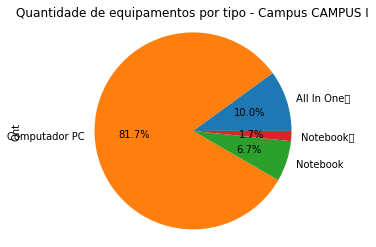

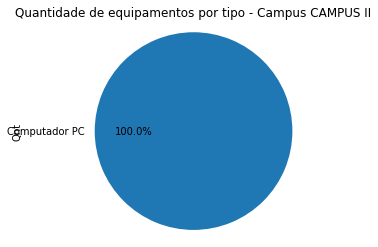

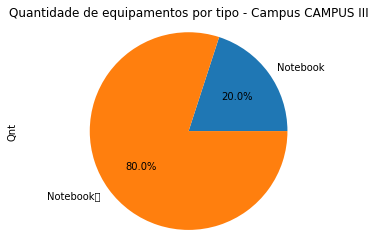

In [ ]:
# Plotar o gráfico de pizza para cada campus
for campus, dados in agrupar.groupby('CAMPUS'): #o for irá percorrer sobre cada grupo de dados agrupados a partir da coluna "CAMPUS" na variavel "agrupar". A variavel que chamei de "campus" armazena o nome de cada campus (I, II e III) e a variavel dados armazena as informações de cada um.
    dados.plot.pie(y='Qnt', labels=dados['TIPO'], legend=False, title=f'Quantidade de equipamentos por tipo - Campus {campus}', autopct='%.1f%%') #Aqui estou gerando um gráfico de pizza p/ cada campus, usando a coluna 'Qnt' que defini acima como dados e a coluna 'TIPO' como rótulos das fatias. O argumento "legend=False" remove a legenda do gráfico e o argumento "title" adiciona um título ao gráfico, incluindo o nome do campus atual.
    plt.axis('equal') #Esse comando faz com que os eixos x e y tenham a mesma escala, tornando as fatias do gráfico circular.
    plt.show() 

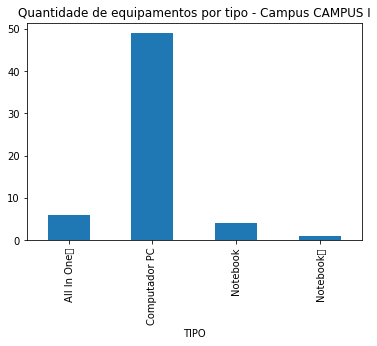

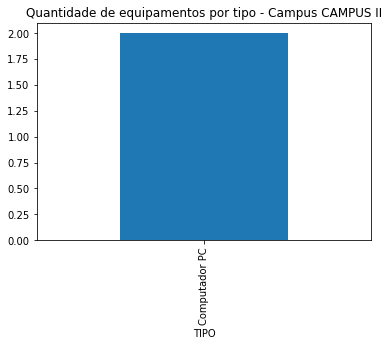

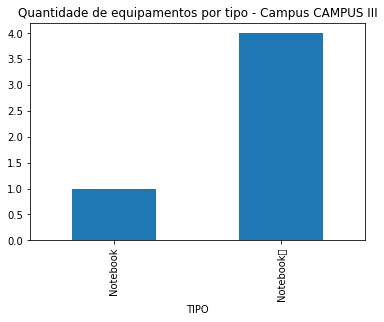

In [ ]:
for campus, dados in agrupar.groupby('CAMPUS'):
    dados.plot.bar(x='TIPO', y='Qnt', legend=False, title=f'Quantidade de equipamentos por tipo - Campus {campus}')
    plt.show()


#**ANÁLISE DE MEMÓRIAS DA BASE IESPES**

Identificando quais os CAMPUS que ainda utilizam memória do tipo DDR-2 de 4GB

In [ ]:
filtro_memoria = dadosatv[dadosatv['MÉMORIA'] == 'DDR-2 4GB'] 
campus_com_memoria = filtro_memoria['CAMPUS'].value_counts() 
print (campus_com_memoria) 

CAMPUS I    2
Name: CAMPUS, dtype: int64


Agora, verificando os tipos de memória existentes em cada CAMPUS

In [ ]:
agrupar = dadosatv.groupby(['CAMPUS', 'MÉMORIA']).size().reset_index(name='Qnt') #Lembrar: a) o argumento "size()" conta o número de ocorrências de cada combinação de valores nas colunas definidas. b) o "reset.index" transforma o resultado em uma nosa base e serve p/ reiniciar a minha base, criando depois uma nova coluna com o novo indice.
print (agrupar)

        CAMPUS    MÉMORIA  Qnt
0     CAMPUS I  DDR-2 2GB    1
1     CAMPUS I  DDR-2 4GB    2
2     CAMPUS I  DDR-3 2GB    2
3     CAMPUS I  DDR-3 4GB   41
4     CAMPUS I  DDR-3 6GB    1
5     CAMPUS I  DDR-3 8GB    4
6     CAMPUS I  DDR-4 4GB    2
7     CAMPUS I  DDR-4 8GB    2
8     CAMPUS I  DDR2- 2GB    1
9    CAMPUS II  DDR-3 4GB    2
10  CAMPUS III  DDR-4 4GB    5
